In [30]:
import pandas as pd
df = pd.read_csv('./data/customer_data.csv')
df.head(10)

,Age,Income,Product_Category,Purchased
0,36,64308.0,Electronics,0
1,48,31920.0,Clothing,0
2,34,84361.0,Home Appliances,0
3,68,57081.0,Home Appliances,0
4,42,NaN,Electronics,0
5,44,44204.0,Electronics,0
6,18,74068.0,Home Appliances,0
7,24,103456.0,Home Appliances,0
8,28,28120.0,Electronics,0
9,30,91725.0,Clothing,0


In [31]:
df.shape

(2011, 4)

In [32]:
df.nunique()

Age                   52
Income              1812
Product_Category       3
Purchased              2
dtype: int64

In [33]:
df.isnull().sum()

Age                   0
Income              103
Product_Category     98
Purchased             0
dtype: int64

In [34]:
df['Income']

0        64308.0
1        31920.0
2        84361.0
3        57081.0
4            NaN
          ...   
2006    109779.0
2007     79875.0
2008    131889.0
2009     47690.0
2010    108110.0
Name: Income, Length: 2011, dtype: float64

In [35]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [36]:
df.isnull().sum()

Age                  0
Income               0
Product_Category    98
Purchased            0
dtype: int64

In [37]:
df['Product_Category'].fillna(df['Product_Category'].mode()[0], inplace=True)

C:\Users\avinash\AppData\Local\Temp\ipykernel_20408\4009997756.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category'].fillna(df['Product_Category'].mode()[0], inplace=True)


In [38]:
df.isnull().sum()

Age                 0
Income              0
Product_Category    0
Purchased           0
dtype: int64

In [41]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_catagory=encoder.fit_transform(df[['Product_Category']]).toarray()

In [42]:
encoded_df=pd.DataFrame(encoded_catagory,columns=encoder.get_feature_names_out(['Product_Category']))

In [43]:
concat= pd.concat([df,encoded_df],axis=1)
concat.head

<bound method NDFrame.head of       Age    Income Product_Category  Purchased  Product_Category_Clothing  \
0      36   64308.0      Electronics          0                        0.0   
1      48   31920.0         Clothing          0                        1.0   
2      34   84361.0  Home Appliances          0                        0.0   
3      68   57081.0  Home Appliances          0                        0.0   
4      42   84320.0      Electronics          0                        0.0   
...   ...       ...              ...        ...                        ...   
2006   26  109779.0         Clothing          0                        1.0   
2007   50   79875.0  Home Appliances          0                        0.0   
2008   68  131889.0         Clothing          0                        1.0   
2009   33   47690.0         Clothing          0                        1.0   
2010   34  108110.0         Clothing          0                        1.0   

      Product_Category_Electronic

In [45]:
concat=concat.drop('Product_Category',axis=1)

In [46]:
concat.head

<bound method NDFrame.head of       Age    Income  Purchased  Product_Category_Clothing  \
0      36   64308.0          0                        0.0   
1      48   31920.0          0                        1.0   
2      34   84361.0          0                        0.0   
3      68   57081.0          0                        0.0   
4      42   84320.0          0                        0.0   
...   ...       ...        ...                        ...   
2006   26  109779.0          0                        1.0   
2007   50   79875.0          0                        0.0   
2008   68  131889.0          0                        1.0   
2009   33   47690.0          0                        1.0   
2010   34  108110.0          0                        1.0   

      Product_Category_Electronics  Product_Category_Home Appliances  
0                              1.0                               0.0  
1                              0.0                               0.0  
2                       

In [47]:
df['Purchased'].value_counts()

Purchased
0    1811
1     200
Name: count, dtype: int64

In [48]:
x = concat.drop('Purchased', axis=1)
y = concat['Purchased']

In [49]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x,y)

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
model = RandomForestClassifier(max_features='sqrt', random_state=42)

model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
prediction = model.predict(x_test)
print(prediction)

[1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1
 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0
 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1
 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1
 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1
 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 0 0 0 1 1 0 0 1 

In [61]:
accuracy = accuracy_score(y_test, prediction)
print('model accuracy is:', accuracy*100)

model accuracy is: 92.13793103448276


In [62]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, x_train, y_train, cv=5)
print("Cross-validation accuracy:", cv_scores.mean())


Cross-validation accuracy: 0.9247573104639389


In [74]:
import numpy as np

def get_user_input():
    # Ask for user inputs
    age = int(input("Enter Customer Age: "))
    income = float(input("Enter Customer Income: "))
    category = input("Enter Product Category (Clothing, Electronics, Home Appliances): ").strip()

    # Convert to DataFrame
    user_data = pd.DataFrame([[age, income, category]], columns=['Age', 'Income', 'Product_Category'])

    # Apply One-Hot Encoding (same as training)
    encoded_input = encoder.transform(user_data[['Product_Category']]).toarray()
    encoded_input_df = pd.DataFrame(encoded_input, columns=encoder.get_feature_names_out(['Product_Category']))

    # Merge with numerical data
    final_input = pd.concat([user_data.drop(columns=['Product_Category']), encoded_input_df], axis=1)

    return final_input

# Get user input and predict
user_input = get_user_input()
prediction = model.predict(user_input)

print("Prediction:", "✅ Purchased" if prediction[0] == 1 else "❌ Not Purchased")


Prediction: ❌ Not Purchased


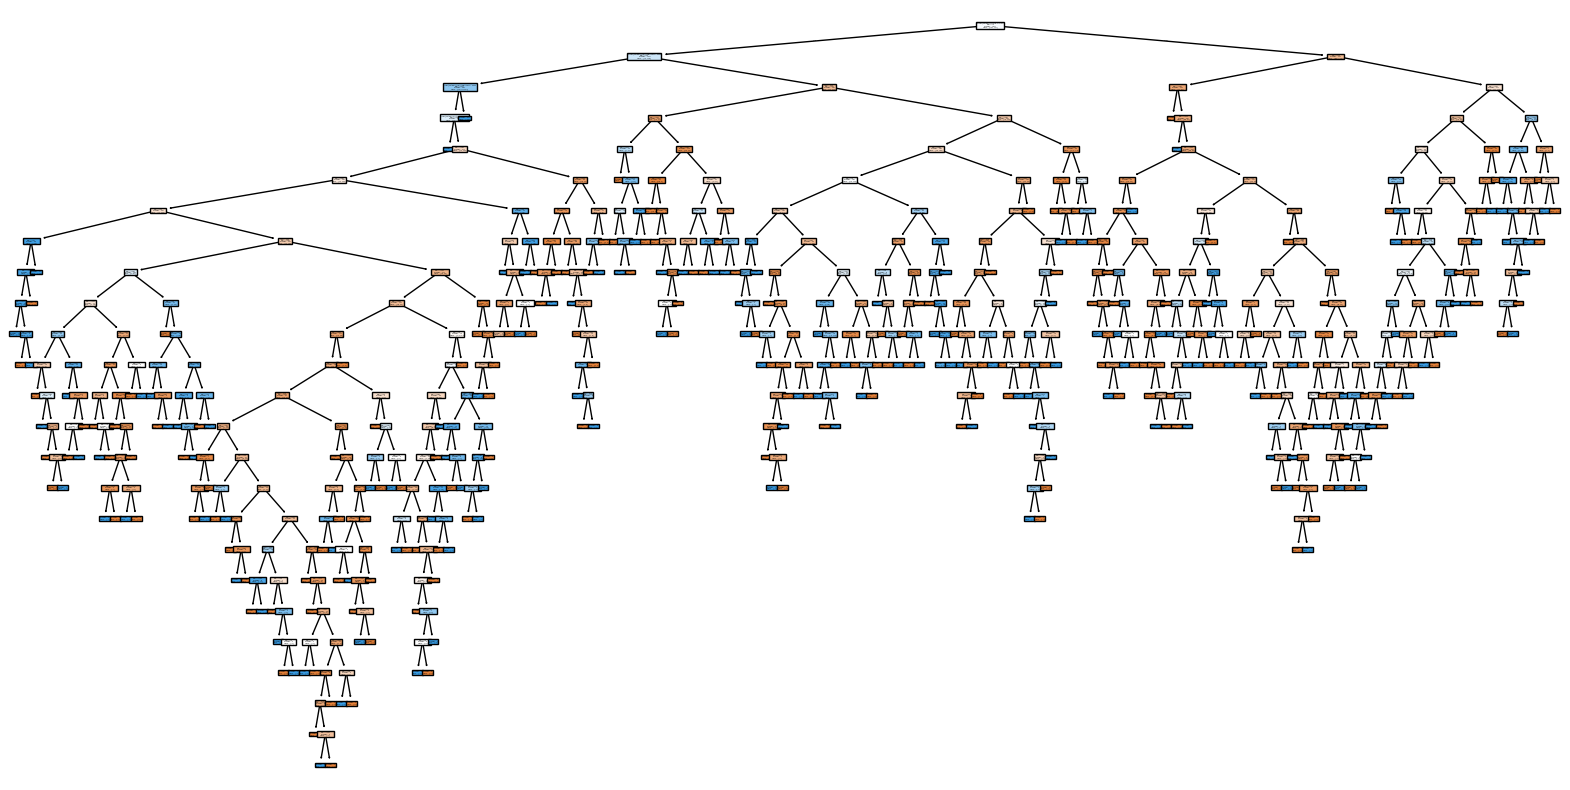

In [75]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot one tree from the Random Forest
plt.figure(figsize=(20,10))
plot_tree(model.estimators_[0], feature_names=x_train.columns, filled=True)
plt.show()
